<a href="https://colab.research.google.com/github/Muppidathe/ml_project/blob/master/excersise_grid_random_forest_classifiction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np

In [2]:
df=pd.read_parquet('train.parquet')
df=df.drop(columns=['Date'])
df

,X1,X2,X3,X4,X5,target
0,1.518921,5.463154,1.0,2.718282,2.890372,0
1,1.546509,5.458010,1.0,2.718282,2.833213,1
2,1.645427,5.456560,1.0,7.389056,2.890372,1
3,1.652022,5.458479,1.0,2.718282,2.890372,1
4,1.695538,5.466709,1.0,2.718282,2.890372,0
...,...,...,...,...,...,...
1639419,1.000000,5.482346,1.0,1.000000,0.000000,0
1639420,1.000000,5.486580,1.0,1.000000,0.000000,0
1639421,1.000000,5.484797,1.0,1.000000,0.000000,0
1639422,1.000000,5.483551,1.0,1.000000,0.000000,0


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1639424 entries, 0 to 1639423
Data columns (total 6 columns):
 #   Column  Non-Null Count    Dtype  
---  ------  --------------    -----  
 0   X1      1639424 non-null  float64
 1   X2      1639424 non-null  float64
 2   X3      1639424 non-null  float64
 3   X4      1639424 non-null  float64
 4   X5      1639424 non-null  float64
 5   target  1639424 non-null  object 
dtypes: float64(5), object(1)
memory usage: 75.0+ MB


In [4]:
df['target']=df['target'].astype(dtype='float')

In [5]:
df.isna().sum()

,0
X1,0
X2,0
X3,0
X4,0
X5,0
target,0


In [6]:
df.describe()

,X1,X2,X3,X4,X5,target
count,1.639424e+06,1.639424e+06,1.639424e+06,1.639424e+06,1.639424e+06,1.639424e+06
mean,1.139258e+00,5.488189e+00,4.110388e+32,2.706323e+29,1.187219e+00,8.562764e-03
std,1.391992e-01,1.342811e-02,2.346156e+35,5.812988e+31,1.304814e+00,9.213820e-02
min,1.000000e+00,5.412539e+00,1.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00
25%,1.049171e+00,5.480597e+00,1.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00
50%,1.105171e+00,5.488979e+00,1.000000e+00,1.000000e+00,6.931472e-01,0.000000e+00
75%,1.214096e+00,5.496717e+00,1.000000e+00,2.718282e+00,2.890372e+00,0.000000e+00
max,4.014850e+00,5.541852e+00,1.651636e+38,5.540622e+34,3.465736e+00,1.000000e+00


# checking for imbalance between data

In [7]:
df['target'].value_counts()

,count
target,
0.0,1625386
1.0,14038


# there are high imbalance betwwen the data for machine this much of data is not important so we can reduce data points from class 0

# plotting distribution's

In [8]:
import seaborn as sns

<Axes: xlabel='X1', ylabel='Count'>

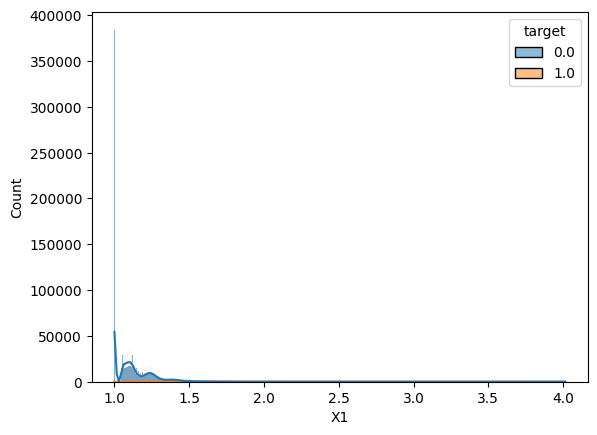

In [9]:
sns.histplot(data=df,x='X1',kde=True,hue='target')

<Axes: xlabel='X2', ylabel='Count'>

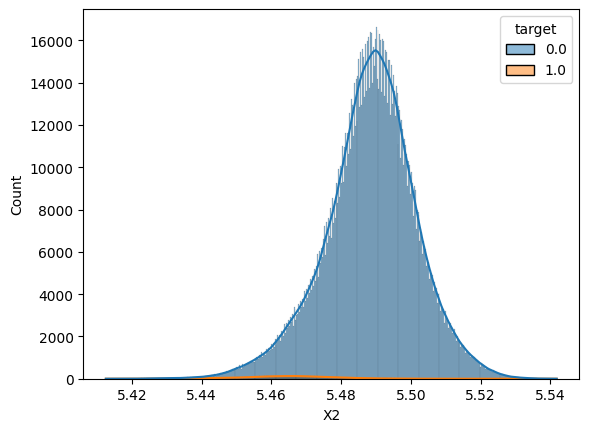

In [10]:
sns.histplot(data=df,x='X2',kde=True,hue='target')

<Axes: xlabel='X3', ylabel='Count'>

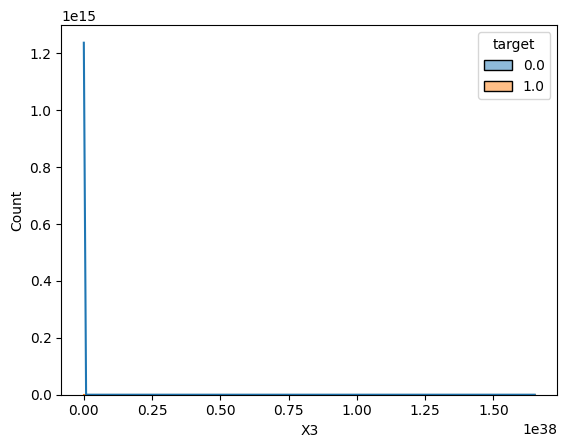

In [11]:
sns.histplot(data=df,x='X3',kde=True,hue='target')

<Axes: xlabel='X4', ylabel='Count'>

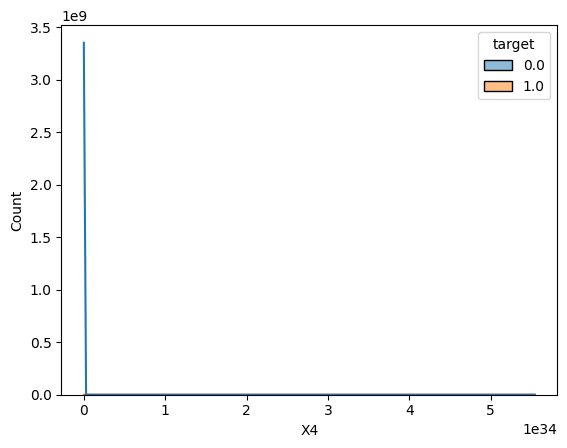

In [12]:
sns.histplot(data=df,x='X4',kde=True,bins=50,hue='target')

<Axes: xlabel='X5', ylabel='Count'>

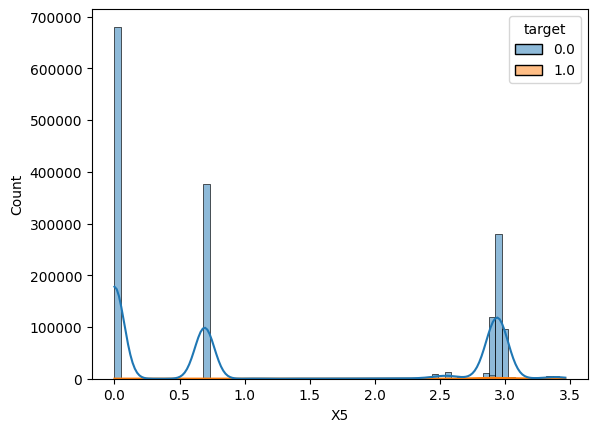

In [13]:
sns.histplot(data=df,x='X5',kde=True,hue='target')

# outlier checking

<Axes: ylabel='X1'>

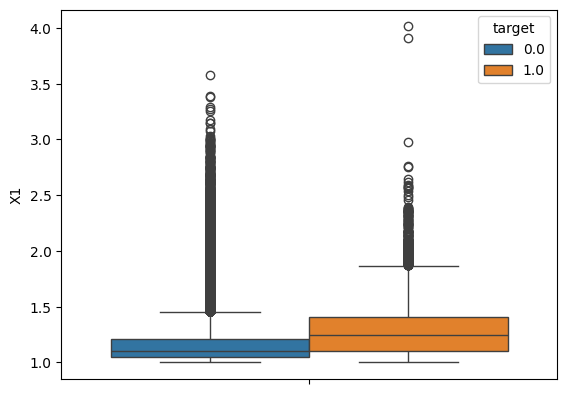

In [14]:
sns.boxplot(data=df,y='X1',hue='target')

<Axes: ylabel='X2'>

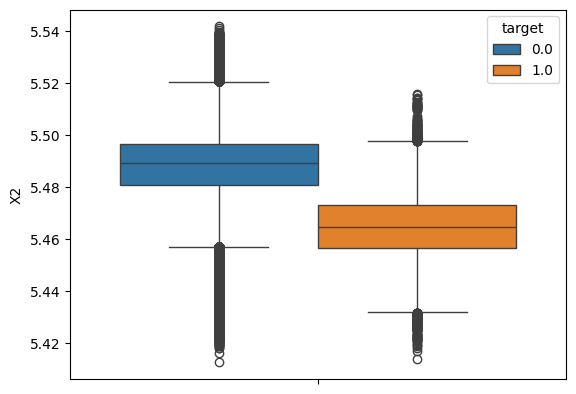

In [15]:
sns.boxplot(data=df,y='X2',hue='target')

<Axes: ylabel='X3'>

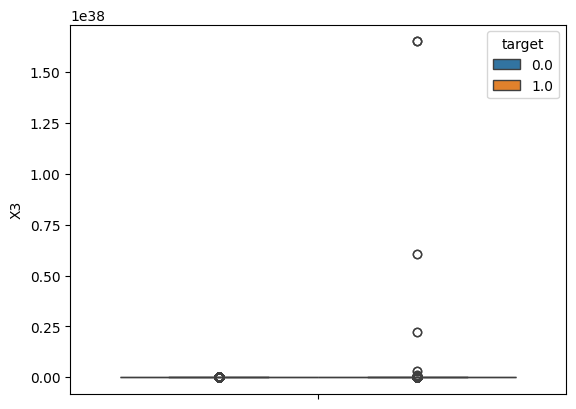

In [16]:
sns.boxplot(data=df,y='X3',hue='target')

<Axes: ylabel='X4'>

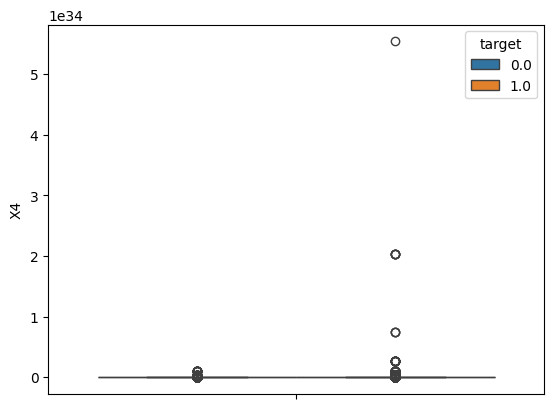

In [17]:
sns.boxplot(data=df,y='X4',hue='target')

<Axes: ylabel='X5'>

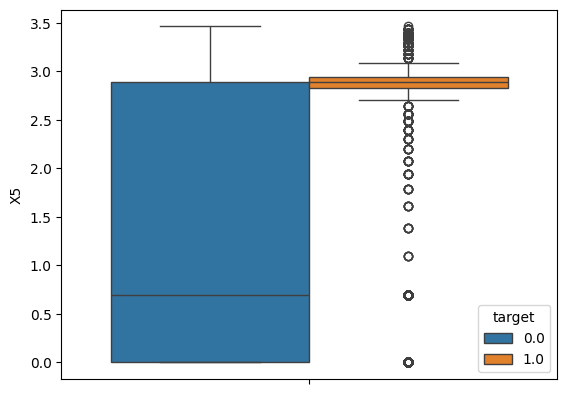

In [18]:
sns.boxplot(data=df,y='X5',hue='target')

# checking for lineare relationship

<Axes: xlabel='X1', ylabel='target'>

/usr/local/lib/python3.11/dist-packages/IPython/core/events.py:89: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  func(*args, **kwargs)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


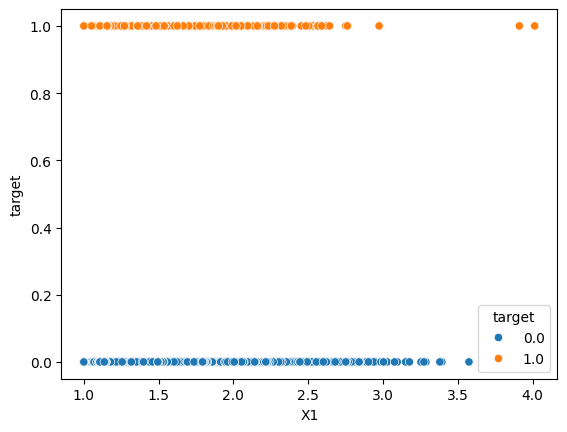

In [19]:
sns.scatterplot(data=df,x='X1',y='target',hue='target')

<Axes: xlabel='X2', ylabel='target'>

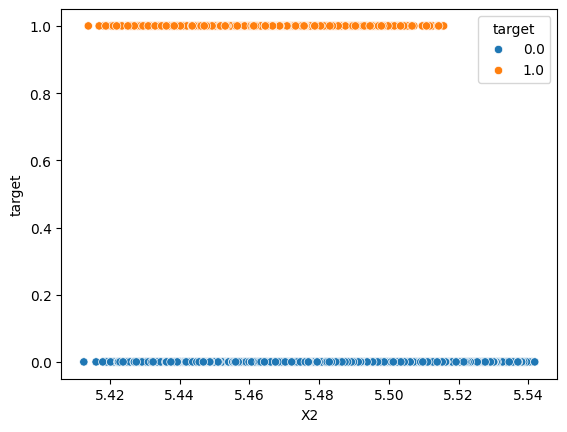

In [20]:
sns.scatterplot(data=df,x='X2',y='target',hue='target')

<Axes: xlabel='X3', ylabel='target'>

/usr/local/lib/python3.11/dist-packages/IPython/core/events.py:89: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  func(*args, **kwargs)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


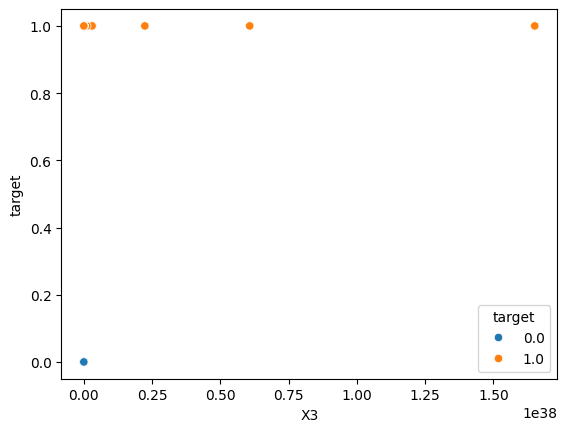

In [21]:
sns.scatterplot(data=df,x='X3',y='target',hue='target')

<Axes: xlabel='X4', ylabel='target'>

/usr/local/lib/python3.11/dist-packages/IPython/core/events.py:89: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  func(*args, **kwargs)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


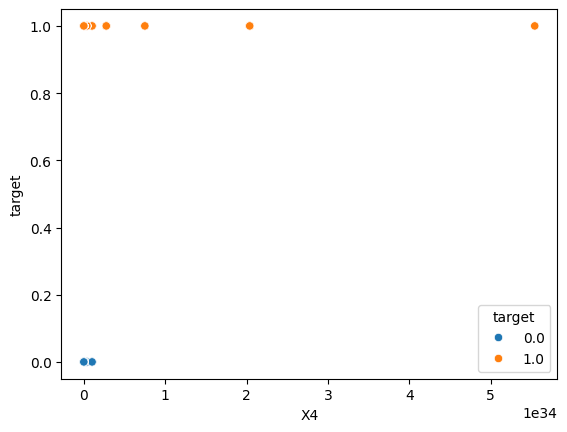

In [22]:
sns.scatterplot(data=df,x='X4',y='target',hue='target')

<Axes: xlabel='X5', ylabel='target'>

/usr/local/lib/python3.11/dist-packages/IPython/core/events.py:89: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  func(*args, **kwargs)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


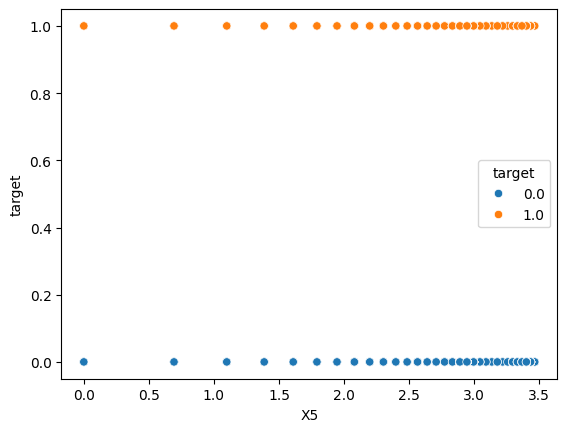

In [23]:
sns.scatterplot(data=df,x='X5',y='target',hue='target')

# there are no linear relationship between the data so we can;t use linear models

In [24]:
x=df.drop(columns=['target'])
y=df['target']

In [25]:
from imblearn.under_sampling import RandomUnderSampler
rus = RandomUnderSampler(random_state=42)

# Apply downsampling
x_resample,y_resample = rus.fit_resample(x, y)
y_resample.value_counts()

,count
target,
0.0,14038
1.0,14038


In [26]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x_resample,y_resample,test_size=.8,random_state=42)

In [27]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV,StratifiedKFold
model=RandomForestClassifier(random_state=42,)
params={'max_depth':[3,10,15,17,19,20],"criterion" : ["gini"],'n_estimators' :[50,80,100,120]}
cv=StratifiedKFold(n_splits=5,shuffle=True,random_state=42)
grid=GridSearchCV(estimator=model,param_grid=params,scoring='accuracy',n_jobs=-1,cv=cv,verbose=1,)
grid.fit(x_train,y_train)

Fitting 5 folds for each of 24 candidates, totalling 120 fits


GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=42, shuffle=True),
             estimator=RandomForestClassifier(random_state=42), n_jobs=-1,
             param_grid={'criterion': ['gini'],
                         'max_depth': [3, 10, 15, 17, 19, 20],
                         'n_estimators': [50, 80, 100, 120]},
             scoring='accuracy', verbose=1)

In [28]:
grid.best_estimator_

RandomForestClassifier(max_depth=10, n_estimators=80, random_state=42)

In [29]:
grid.best_score_

np.float64(0.9362422083704363)

In [34]:
from sklearn.metrics import f1_score,accuracy_score
train_res=grid.predict(x_train)
train_accur=accuracy_score(y_train,train_res)
train_f1_0=f1_score(y_train,train_res,pos_label=0)
train_f1_1=f1_score(y_train,train_res,pos_label=1)
print('train accuracy',train_accur)
print('train f1 with respect to 0',train_f1_0)
print('train f1 with respect to 1',train_f1_1)

train accuracy 0.967586821015138
train f1 with respect to 0 0.9676846590909091
train f1 with respect to 1 0.9674883887102537


# test result

In [35]:
from sklearn.metrics import f1_score,accuracy_score
test_res=grid.predict(x_test)
test_accur=accuracy_score(y_test,test_res)
test_f1_0=f1_score(y_test,test_res,pos_label=0)
test_f1_1=f1_score(y_test,test_res,pos_label=1)
print('test accuracy',test_accur)
print('test f1 with respect to 0',test_f1_0)
print('test f1 with respect to 1',test_f1_1)

test accuracy 0.9382485196562931
test f1 with respect to 0 0.9395721692153531
test f1 with respect to 1 0.9368655833219537
